In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
twitter_dataset = pd.read_csv("C:\\Users\\HP\\Documents\\Twitter_data\\Twitter_Data.csv")
twitter_dataset.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [4]:
twitter_dataset["clean_text"][twitter_dataset["category"].isnull()].unique()

array(['the foundation stone northeast gas grid inaugurated modi came major',
       'dear terrorists you can run but you cant hide are giving more years modi which you won’ see you',
       'offense the best defence with mission shakti modi has again proved why the real chowkidar our',
       'have always heard politicians backing out their promises but modi has been fulfilling his each every',
       'modi government plans felicitate the faceless nameless warriors india totally deserved',
       'chidambaram gives praises modinomics',
       'the reason why modi contested from seats 2014 and the real reason why rahul doing the same now'],
      dtype=object)

In [5]:
twitter_dataset.dropna(inplace=True)
twitter_dataset.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [7]:
clean_text = list(twitter_dataset["clean_text"])
clean_text[:5]

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'talk all the nonsense and continue all the drama will vote for modi ',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ']

In [8]:
import unicodedata
import sys
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import re
punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
stopword = stopwords.words("english")

# [string.translate(punctuation) for string in clean_text][:5]

# [word for word in clean_text if word not in stopword][:5]

cleaned = []

for i in range(len(clean_text)):
    r = re.sub('[^a-zA-Z]', ' ', clean_text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopword]
    r = [string.translate(punctuation) for string in r]
    r = ' '.join(r)
#     print(r)
    cleaned.append(r)
    
# print(cleaned[:5])
# twitter_dataset["clean_text"] = cleaned

In [10]:
twitter_dataset["clean_text"] = cleaned
twitter_dataset.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [11]:
twitter_dataset.shape

(162969, 2)

In [12]:
X_feature = twitter_dataset["clean_text"]
y_target = twitter_dataset["category"]

print(X_feature.shape)
print(y_target.shape)

(162969,)
(162969,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# DictVectorizer,
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X_feature, y_target, random_state=1, train_size=0.8)

# TfidfVectorizer
model = make_pipeline(CountVectorizer(), LogisticRegression())

In [20]:
Xtest.shape

(32594,)

In [14]:
model.fit(Xtrain, ytrain)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [15]:
labels = model.predict(Xtest)

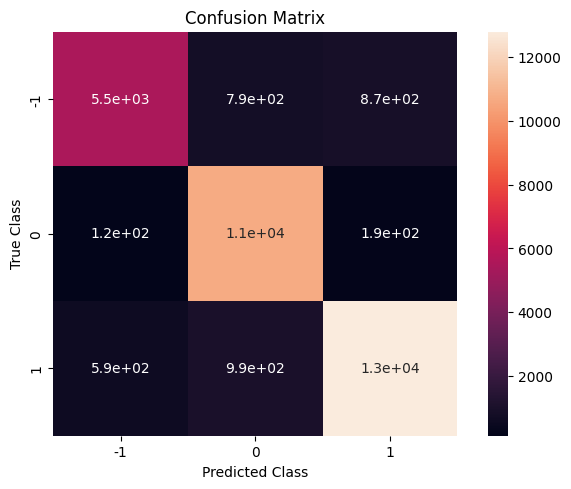

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# mat = confusion_matrix(ytest, labels)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
# xticklabels = twitter_dataset["category"], yticklabels = twitter_dataset["category"],)

# plt.xlabel('true label')
# plt.ylabel('predicted label')
my_target = ['-1', '0', '1']
matrix = confusion_matrix(ytest, labels)

dataframe = pd.DataFrame(matrix, index=my_target, columns=my_target)
dataframe

sns.heatmap(dataframe, square=True, annot=True)
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class");


In [21]:
from sklearn.metrics import classification_report

my_target = ['-1', '0', '1']

print(classification_report(ytest, labels, target_names=my_target))

              precision    recall  f1-score   support

          -1       0.89      0.77      0.82      7178
           0       0.86      0.97      0.91     11028
           1       0.92      0.89      0.91     14388

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, labels)

0.8905933607412407

In [ ]:
twitter_dataset["clean_text"]
twitter_dataset["category"]

In [ ]:
data['label'].value_counts(normalize = True).plot.bar()

<Axes: >

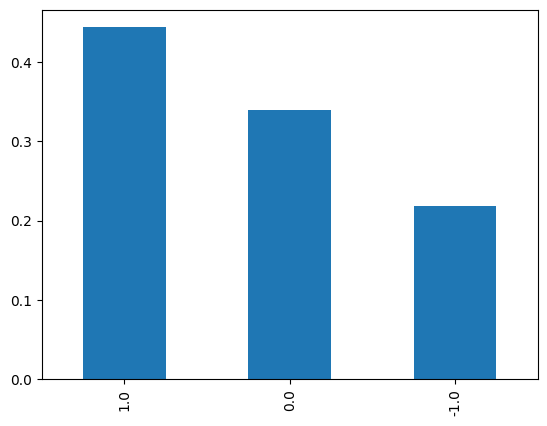

In [22]:
twitter_dataset["category"].value_counts(normalize=True).plot.bar()